In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%matplotlib inline

In [25]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x)-mean)**2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected value {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]
    
    xs = np.linspace(x_min, x_max, 100)
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')
    ax.legend()
    plt.show()

### 8.1 정규분포

$f(x)=\frac{1}{\sqrt{2\pi}\sigma}exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)\;(-\infty<x<\infty)$

$X\sim N(\mu,\sigma^2)이라고\;할\;때\\
E(X)=\mu,\;\;\;\;\;\;V(X)=\sigma^2$

$X\sim N(\mu,\sigma^2)이라고\;할\;때, 임의의\;실수\;a,b에\;대해서\\
aX+b\sim N(a\mu+b,a^2\sigma^2)\\
이\;성립한다.$

In [12]:
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mu)**2/(2*sigma**2))
    return x_range, f

In [13]:
# N(2, 0.5^2)
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [14]:
check_prob(X)

expected value 2.000
variance 0.250


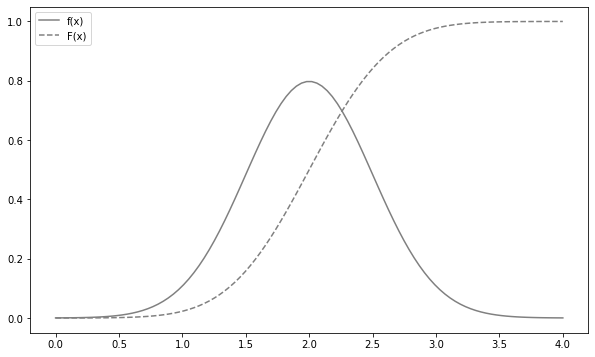

In [26]:
plot_prob(X, 0, 4)

In [27]:
rv = stats.norm(2, 0.5)

In [28]:
rv.mean(), rv.var()

(2.0, 0.25)

In [32]:
# 확률밀도함수
rv.pdf(2)

0.7978845608028654

In [33]:
# 누적분포함수
rv.cdf(1.7)

0.27425311775007355

In [34]:
# Z_alpha
rv.isf(0.3)

2.2622002563540207

In [35]:
# 구간
rv.interval(0.9)

(1.1775731865242636, 2.822426813475736)

In [38]:
rv.isf(0.95), rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

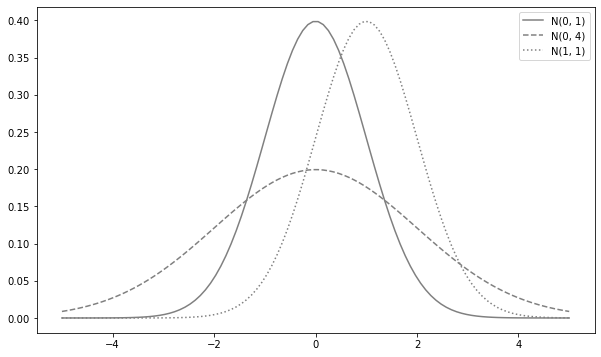

In [39]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0,1),(0,2),(1,1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs), label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
    
ax.legend()
plt.show()

### 8.2 지수분포

$f(x)=
\begin{cases}\lambda e^{-\lambda x}\;\;\;\;(x\geq 0)\\
0\;\;\;\;\;\;\;\;\;\;(otherwise)
\end{cases}$

$X\sim Exp(\lambda)라고\;할\;때\\
E(X)=\frac{1}{\lambda},\;\;\;\;\;\;V(X)=\frac{1}{\lambda^2}$

In [40]:
def Exp(lam):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lam*np.exp(-lam*x)
        else:
            return 0
    return x_range, f

In [42]:
lam = 3
X = Exp(lam)

In [43]:
check_prob(X)

expected value 0.333
variance 0.111


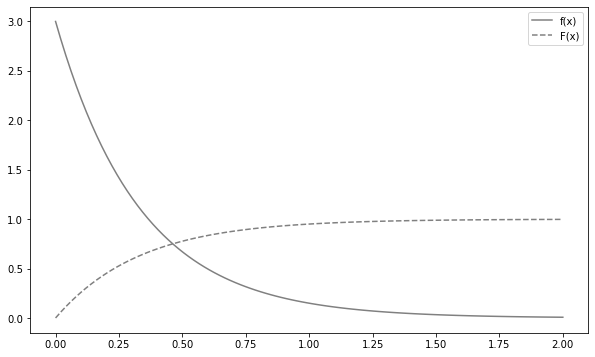

In [44]:
plot_prob(X, 0, 2)

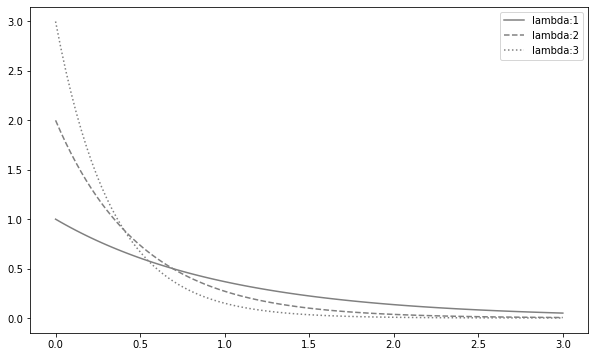

In [46]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1,2,3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs), label=f'lambda:{lam}', ls=ls, color='gray')
ax.legend()
plt.show()

### 8.3 카이제곱분포

$Z_1,Z_2,\dots,Z_n$이 서로 독립이고 $N(0,1)$을 따르고 있을 때, 그 제곱합

$Y=\sum_{i=1}^n Z_i^2$

의 확률분포를 자유도가 n인 카이제곱분포라고 한다.

In [48]:
n = 10
rv = stats.norm()
sample_size = int(1e6)
Zs_sample = rv.rvs((n, sample_size))
chi2_sample = np.sum(Zs_sample**2, axis=0)

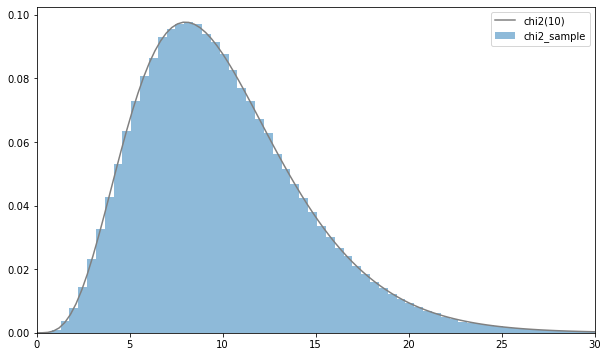

In [50]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0,30,100)
ax.hist(chi2_sample, bins=100, density=True, alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0, 30)
plt.show()

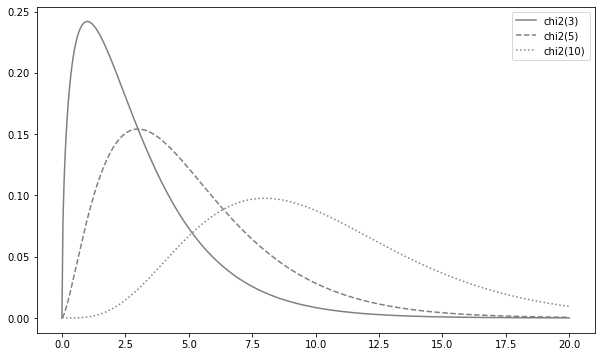

In [52]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs), label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.show()

In [53]:
rv = stats.chi2(5)
rv.isf(0.05)

11.070497693516355

### 8.4 t분포

확률변수 $Z,Y$는 서로 독립이고, $Z$는 표준정규분포 $N(0,1)$을, $Y$는 자유도가 $n$ 인 카이제곱분포 $\chi^2(n)$을 각각 따를 때,

$t=\frac{Z}{\sqrt{Y/n}}$

의 확률분포를 자유도가 n인 t분포라고 합니다.

In [54]:
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
ch2_sample = rv2.rvs(sample_size)

t_sample = Z_sample/np.sqrt(chi2_sample/n)

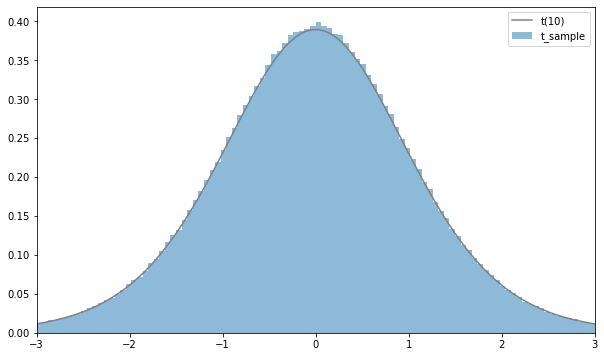

In [55]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range=(-3,3), density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3, 3)
plt.show()

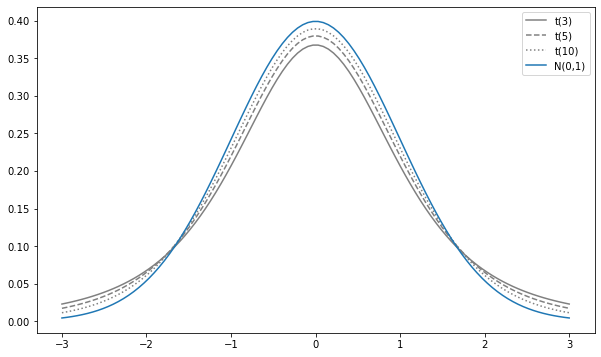

In [57]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs), label=f't({n})', ls=ls, color='gray')

rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0,1)')

ax.legend()
plt.show()

In [58]:
rv = stats.t(5)
rv.isf(0.05)

2.0150483726691575

### 8.5 F 분포

확률변수 $Y_1,Y_2$는 서로 독립이고, 각각 $Y_1\sim\chi^2(n_1),Y_2\sim\chi^2(n_2)$를 따를 때,

$F=\frac{Y_1/n_1}{Y_2/n_2}$

의 확률분포를 자유도가 $n_1,n_2$인 F분포 $F(n_1,n_2)$라고 한다.

In [60]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

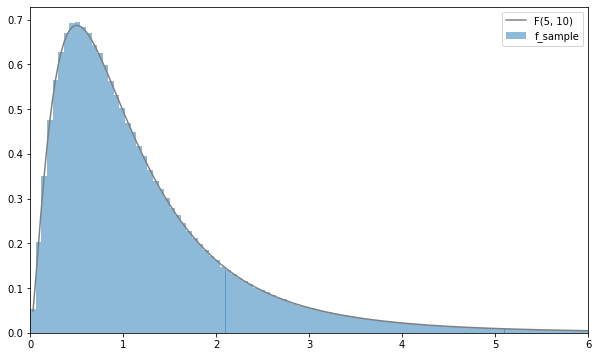

In [61]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.f(n1, n2)
xs = np.linspace(0, 6, 200)[1:]
ax.hist(f_sample, bins=100, range=(0, 6), density=True, alpha=0.5, label='f_sample')
ax.plot(xs, rv.pdf(xs), label=f'F({n1}, {n2})', color='gray')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

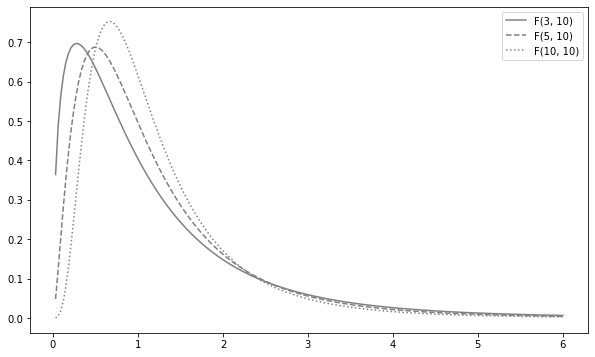

In [62]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 6, 200)[1:]
for n1, ls in zip([3, 5, 10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs), label=f'F({n1}, 10)', ls=ls, color='gray')
    
ax.legend()
plt.show()